# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

   
Sumber dataset: https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
!pip install kneed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Feature Engineering
from kneed import KneeLocator
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Pada bagian ini saya hanya mengambil 20.000 data secara acak karena dataset yang ada terlalu besar

In [3]:
# Load dataset
df = pd.read_csv('/content/Dataset_Input.csv')
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD111326,CUS9847,B2B,Volvic Touch,Water,1.58,53.0,0.1,75.37,Sachsen,2023-06-23
1,ORD129164,CUS4238,B2C,Monster,Soft Drinks,3.12,5.0,0.0,15.60,Bremen,2021-04-08
2,ORD205111,CUS2552,B2B,Hohes C Orange,Juices,2.16,91.0,0.1,176.90,Bremen,2022-06-17
3,ORD66676,CUS6759,B2C,Cranberry Juice,Juices,3.67,12.0,0.0,44.04,Sachsen,2023-11-16
4,ORD90838,CUS1602,B2C,Krombacher,Alcoholic Beverages,1.54,5.0,0.0,7.70,Nordrhein-Westfalen,2021-03-29


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 1. Memahami Struktur Data

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       20000 non-null  object 
 1   Customer_ID    20000 non-null  object 
 2   Customer_Type  20000 non-null  object 
 3   Product        20000 non-null  object 
 4   Category       20000 non-null  object 
 5   Unit_Price     20000 non-null  float64
 6   Quantity       20000 non-null  float64
 7   Discount       20000 non-null  float64
 8   Total_Price    20000 non-null  float64
 9   Region         20000 non-null  object 
 10  Order_Date     20000 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.7+ MB
None


### 2. Menangani Data yang Hilang

In [5]:
# Mengecek jumlah missing values di setiap kolom
missing_values = df.isnull().sum()
print("Jumlah Missing Values:\n", missing_values)
# Menghapus baris yang memiliki missing values
df_cleaned = df.dropna()

Jumlah Missing Values:
 Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


Tidak terdapat indikasi missing value

In [6]:
df_cleaned['Order_Date'] = pd.to_datetime(df_cleaned['Order_Date'], errors='coerce')

### 3. Analisis Distribusi dan Korelasi

In [7]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       20000 non-null  object        
 1   Customer_ID    20000 non-null  object        
 2   Customer_Type  20000 non-null  object        
 3   Product        20000 non-null  object        
 4   Category       20000 non-null  object        
 5   Unit_Price     20000 non-null  float64       
 6   Quantity       20000 non-null  float64       
 7   Discount       20000 non-null  float64       
 8   Total_Price    20000 non-null  float64       
 9   Region         20000 non-null  object        
 10  Order_Date     20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 1.7+ MB
None


In [8]:
# Statistik deskriptif untuk variabel numerik
print(df_cleaned.describe(include=np.number))

         Unit_Price      Quantity      Discount   Total_Price
count  20000.000000  20000.000000  20000.000000  20000.000000
mean       5.907966     23.122850      0.029670    132.049833
std       15.012674     26.949875      0.044604    520.113378
min        0.320000      1.000000      0.000000      0.330000
25%        1.050000      6.000000      0.000000      8.280000
50%        1.750000     11.000000      0.000000     20.950000
75%        3.210000     30.000000      0.050000     69.220000
max      143.960000    100.000000      0.150000  11919.890000


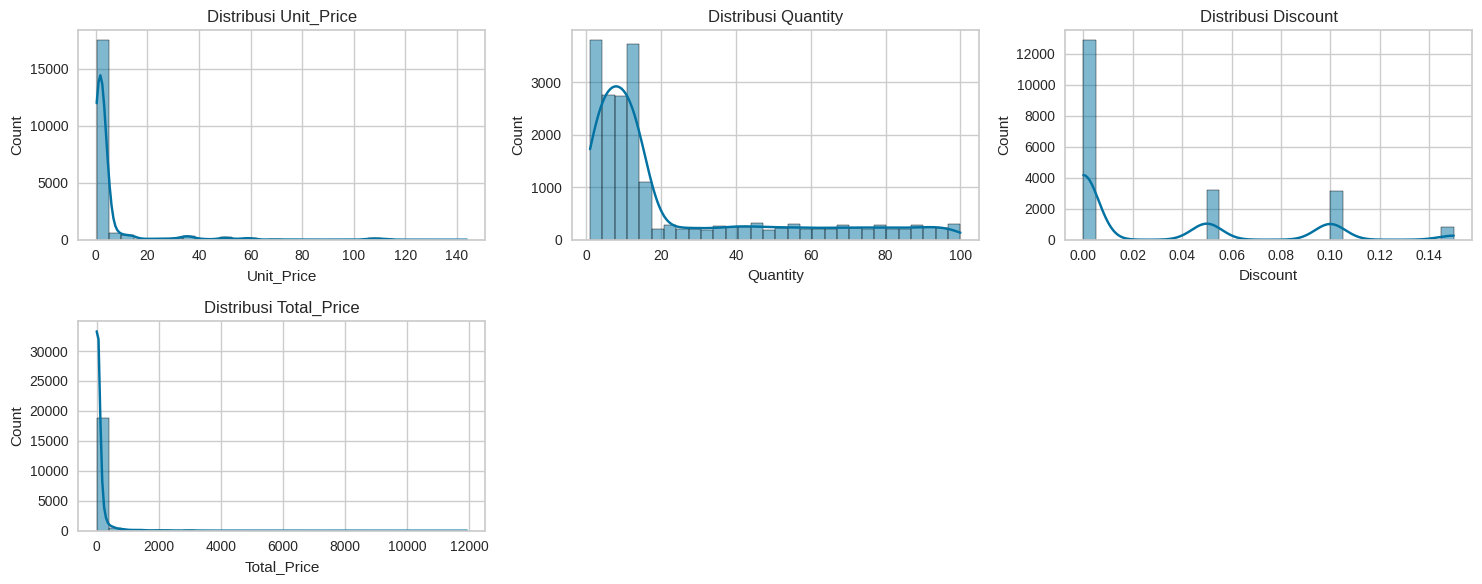

In [9]:
## Analisis Distribusi (Histogram) untuk data numerik
num_cols = df_cleaned.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 6))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

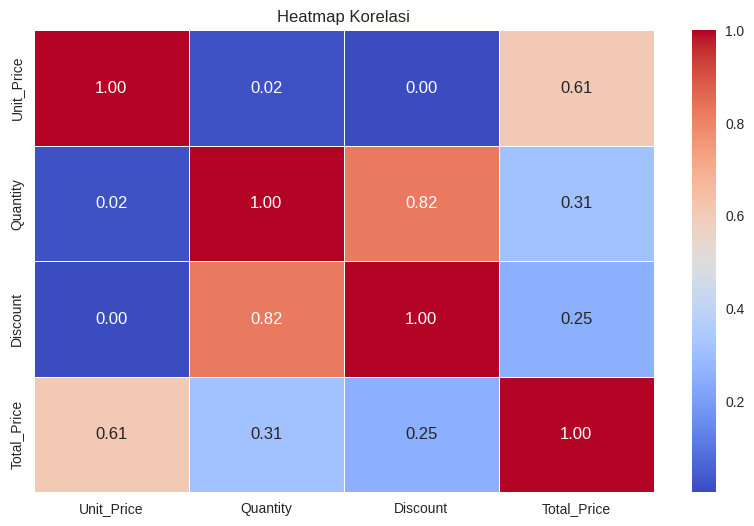

In [10]:
# Membuat heatmap dengan hanya kolom numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi")
plt.show()

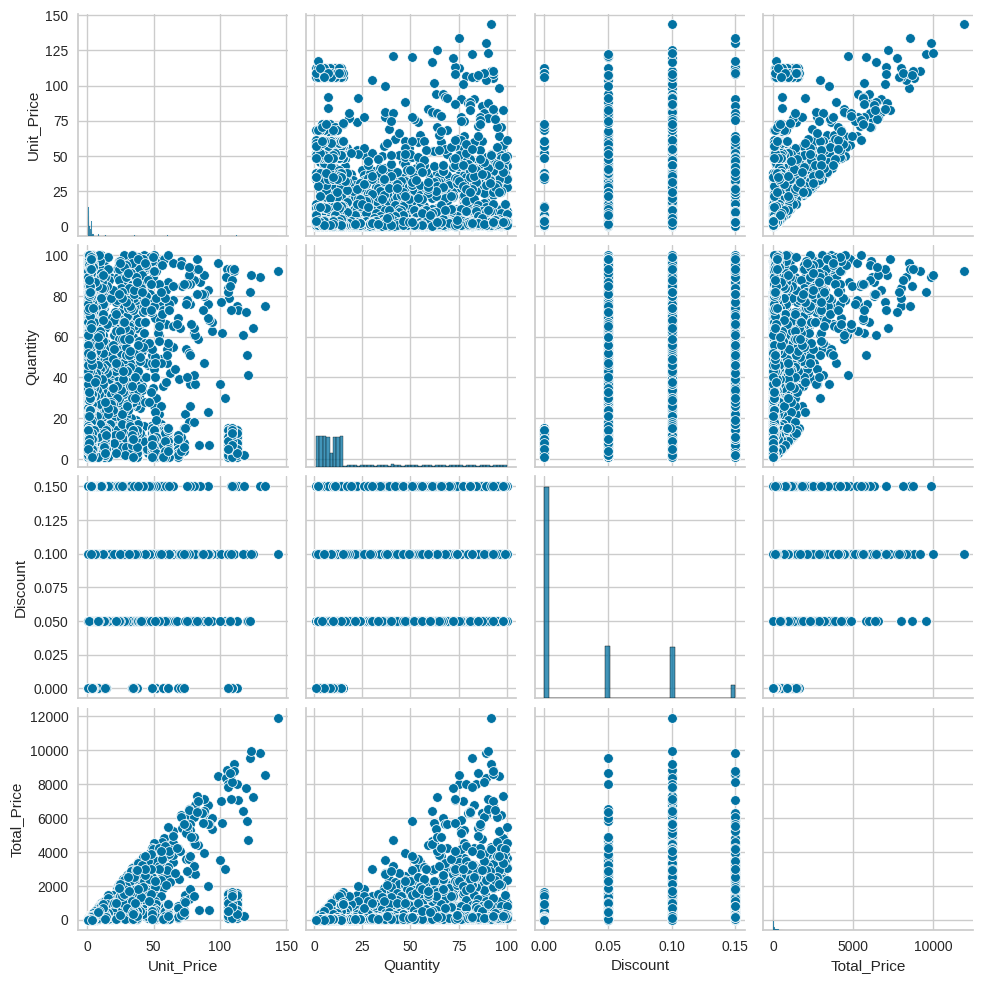

In [11]:
#Hubungan anatara variabel dengan pairplot
sns.pairplot(df_cleaned[num_cols])
plt.show()

### 4. Visualisasi Data

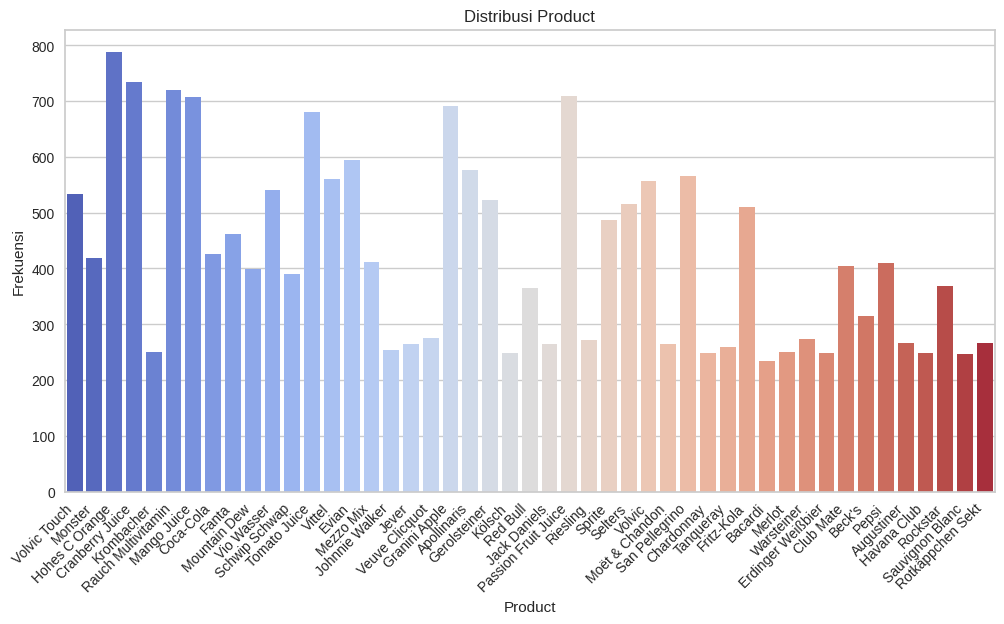

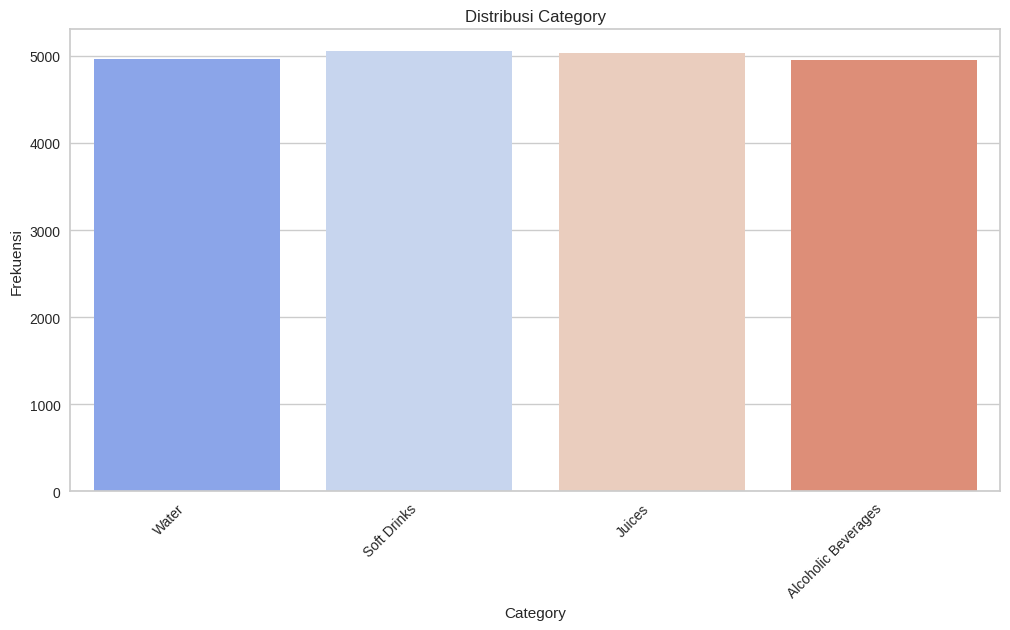

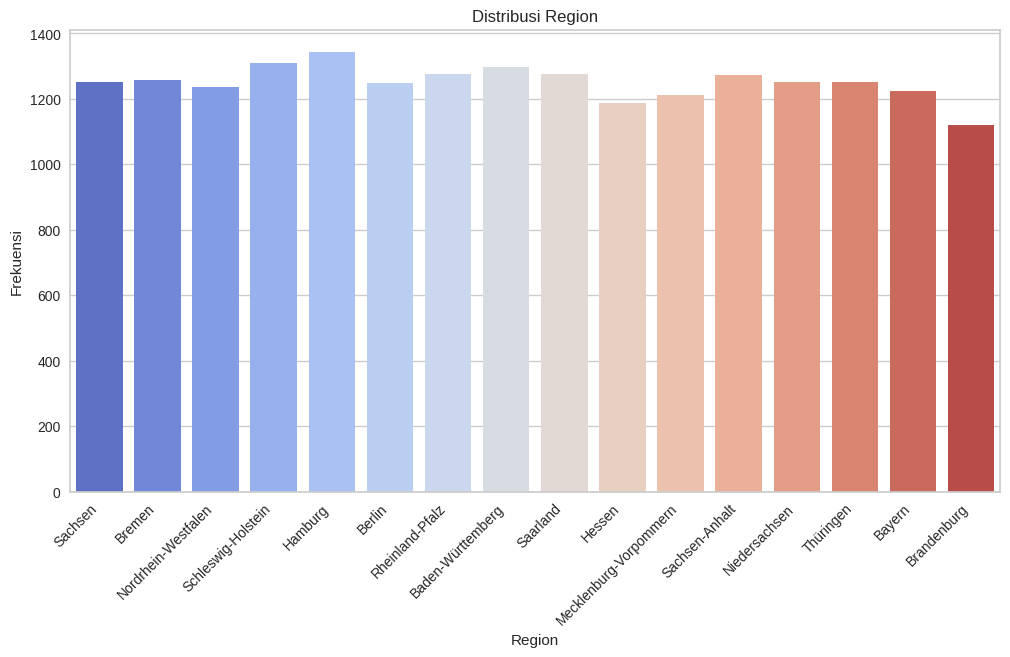

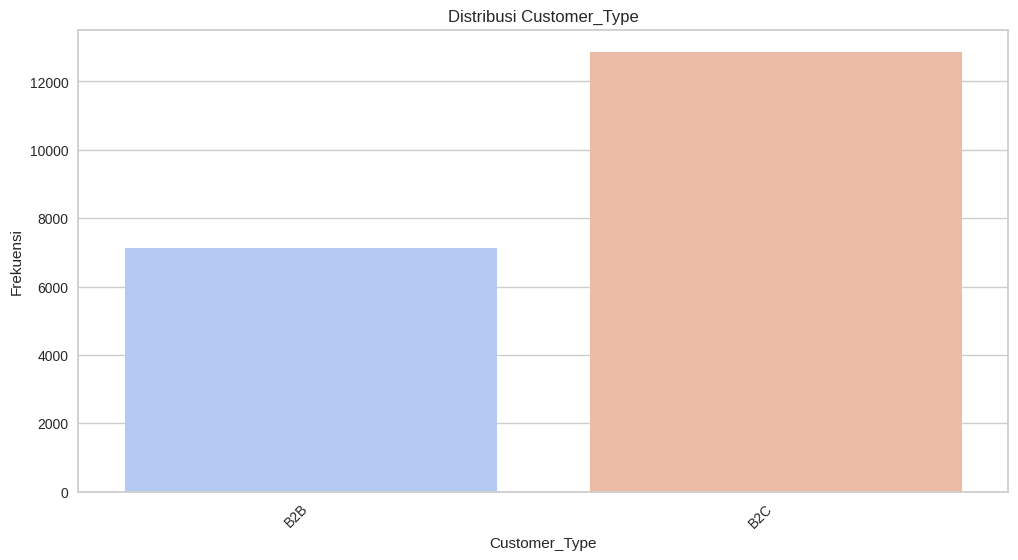

In [12]:
# Visualisasi Variabel Kategorikal
categorical_cols = ["Product", "Category", "Region","Customer_Type"]
for col in ["Product", "Category", "Region","Customer_Type"]:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_cleaned, x=col, hue=col, palette='coolwarm', legend=False)
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

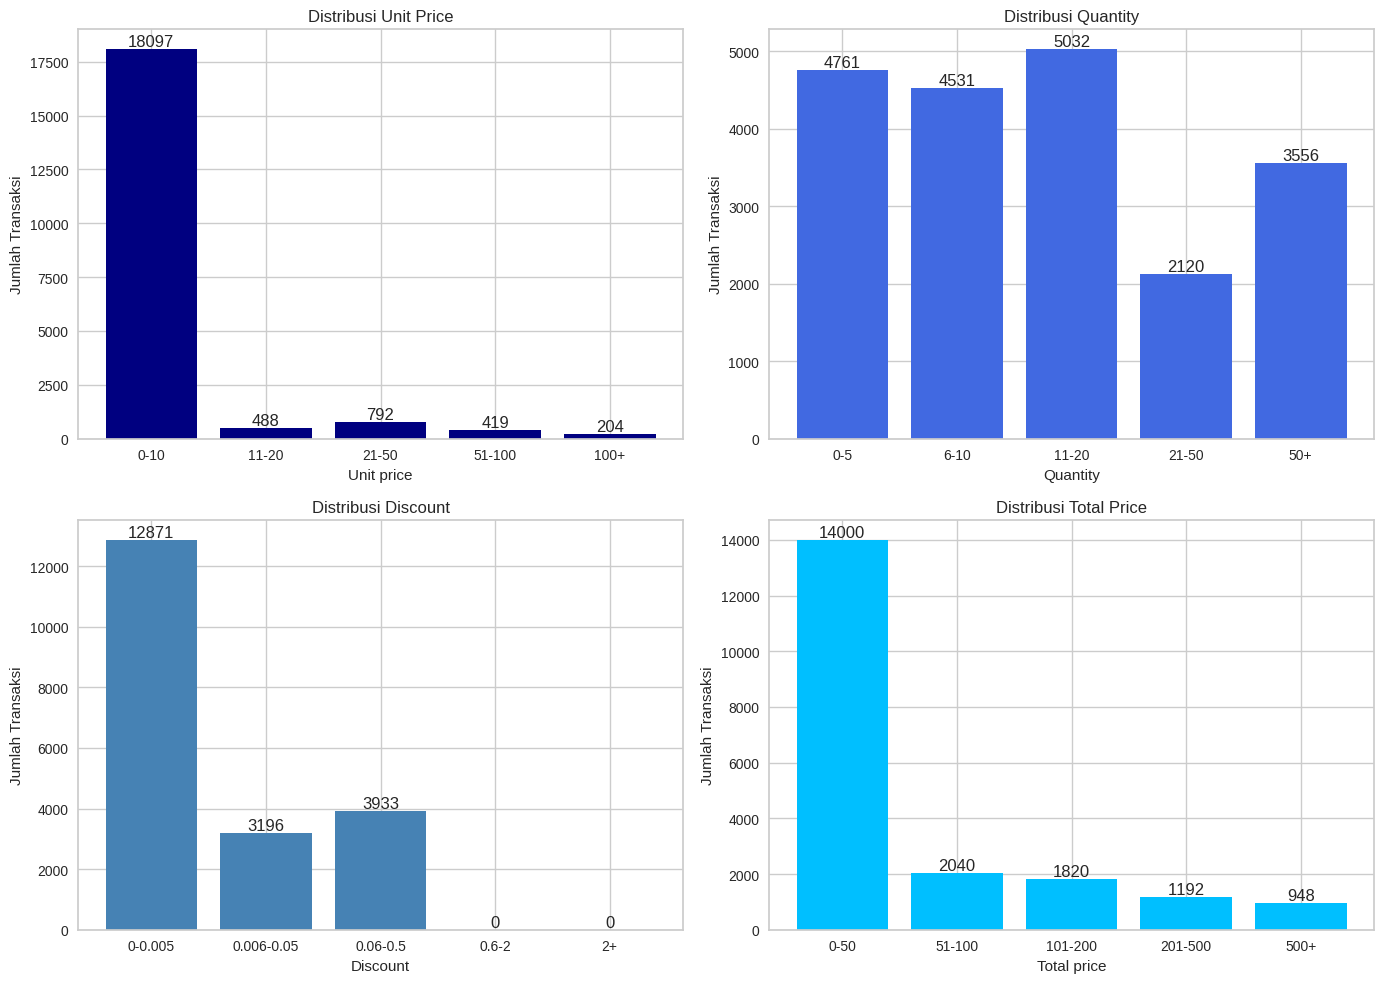

In [13]:
# Visualisasi Data Numerik dengan membuat rentang nilai
bins = {
    "Unit_Price": [0, 10, 20, 50, 100, float('inf')],
    "Quantity": [0, 5, 10, 20, 50, float('inf')],
    "Discount": [0, 0.005, 0.05, 0.5, 2, float('inf')],
    "Total_Price": [0, 50, 100, 200, 500, float('inf')]
}
categories = {
    "Unit_Price": ["0-10", "11-20", "21-50", "51-100", "100+"],
    "Quantity": ["0-5", "6-10", "11-20", "21-50", "50+"],
    "Discount": ["0-0.005", "0.006-0.05", "0.06-0.5", "0.6-2", "2+"],
    "Total_Price": ["0-50", "51-100", "101-200", "201-500", "500+"]
}

# Hitung distribusi kategori
counts = {key: pd.cut(df[key], bins=bins[key], labels=categories[key], include_lowest=True).value_counts().sort_index() for key in bins.keys()}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = ['navy', 'royalblue', 'steelblue', 'deepskyblue']
titles = ["Distribusi Unit Price", "Distribusi Quantity", "Distribusi Discount", "Distribusi Total Price"]
for idx, (key, ax) in enumerate(zip(counts.keys(), axes.flatten())):
    ax.bar(counts[key].index, counts[key].values, color=colors[idx])
    ax.set_title(titles[idx])
    ax.set_xlabel(key.replace("_", " ").capitalize())
    ax.set_ylabel("Jumlah Transaksi")

    # Tambahkan label di atas tiap bar
    for i, val in enumerate(counts[key].values):
        ax.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Menghapus dan Menangani Data Kosong

In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       20000 non-null  object        
 1   Customer_ID    20000 non-null  object        
 2   Customer_Type  20000 non-null  object        
 3   Product        20000 non-null  object        
 4   Category       20000 non-null  object        
 5   Unit_Price     20000 non-null  float64       
 6   Quantity       20000 non-null  float64       
 7   Discount       20000 non-null  float64       
 8   Total_Price    20000 non-null  float64       
 9   Region         20000 non-null  object        
 10  Order_Date     20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 1.7+ MB


In [15]:
print(df_cleaned.isnull().sum())

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


Terlihat dari output berkut bahwa tidak terdapat indikasi missing value

Menghapus Data Duplikat

In [16]:
# Cek jumlah duplikasi
print(f"Jumlah data duplikat: {df.duplicated().sum()}")
# Hapus duplikasi jika ada
df_cleaned = df_cleaned.drop_duplicates()

Jumlah data duplikat: 0


Terlihat dari output berkut bahwa tidak terdapat indikasi duplikasi data


Menangani Outliers

In [17]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)  # Kuartil pertama (Q1)
        Q3 = df_clean[col].quantile(0.75)  # Kuartil ketiga (Q3)
        IQR = Q3 - Q1  # Rentang interkuartil
        lower_bound = Q1 - 8.0 * IQR  # Batas bawah
        upper_bound = Q3 + 8.0 * IQR  # Batas atas

        # Hapus baris yang memiliki nilai di luar batas bawah & atas
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

numeric_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']

# Hapus outliers dari dataframe df_cleaned
df_cleaned_ = remove_outliers_iqr(df_cleaned, numeric_cols)
print(f"Jumlah data sebelum menghapus outliers: {df_cleaned.shape[0]}")
print(f"Jumlah data setelah menghapus outliers: {df_cleaned_.shape[0]}")

Jumlah data sebelum menghapus outliers: 20000
Jumlah data setelah menghapus outliers: 18366


Setelah proses identifikasi dan penghapusan outlier dilakukan, jumlah data mengalami penurunan dari 20.000 menjadi 18.366. Hal ini menunjukkan bahwa terdapat 1.634 data yang terdeteksi sebagai outlier dan dihapus dari dataset. Penghapusan ini bertujuan untuk meningkatkan kualitas analisis dengan menghilangkan data yang mungkin tidak relevan atau ekstrem, sehingga hasil pemodelan dan interpretasi menjadi lebih akurat serta representatif terhadap pola sebenarnya dalam dataset.

Menghapus kolom yang tidak relevan

In [18]:
df_cleaned_ = df_cleaned_.drop(columns=['Order_ID', 'Customer_ID', 'Order_Date', 'Product', 'Category', 'Region'])
df_cleaned_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18366 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  18366 non-null  object 
 1   Unit_Price     18366 non-null  float64
 2   Quantity       18366 non-null  float64
 3   Discount       18366 non-null  float64
 4   Total_Price    18366 non-null  float64
dtypes: float64(4), object(1)
memory usage: 860.9+ KB


Dalam proses clustering, menghapus kolom yang tidak relevan adalah langkah penting untuk memastikan bahwa algoritma hanya bekerja dengan fitur yang benar-benar berkontribusi dalam pengelompokan data. Kolom seperti Order_ID, Customer_ID, dan Order_Date biasanya tidak memiliki informasi yang berguna dalam menentukan kesamaan antar data, karena bersifat unik untuk setiap transaksi. Alasan utama menghapus kolom Product, Category, dan Region adalah karena kolom tersebut bersifat kategorikal dengan banyak kategori unik. Jika tidak ditangani dengan benar, kolom ini bisa mempengaruhi hasil clustering secara tidak diinginkan.

Encoding dan Normalisasi

Dalam clustering, semua fitur yang digunakan harus dalam bentuk numerik, karena kebanyakan algoritma clustering seperti K-Means hanya bisa bekerja dengan angka. Oleh karena itu, kolom Customer_Type, yang bersifat kategorikal, perlu diubah menjadi format numerik melalui One-Hot Encoding. Selain itu perlu dilakukan normalisasi juga agar skala semua data sama.

In [19]:
one_hot_cols = ['Customer_Type']
# One-Hot Encoding
encoder = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), one_hot_cols)
], remainder='passthrough')

# Pipeline Preprocessing
data_pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', MinMaxScaler())  # Normalisasi setelah encoding
])

# Terapkan pipeline
df_preprocessing = data_pipeline.fit_transform(df_cleaned_)

# Konversi kembali ke DataFrame
df_preprocessing = pd.DataFrame(df_preprocessing, columns=data_pipeline.get_feature_names_out())

print("\n✅ Data telah diproses dan siap untuk pembangunan model clustering")
print(f"Jumlah baris & kolom setelah preprocessing: {df_preprocessing.shape}")
print(df_preprocessing.head())


✅ Data telah diproses dan siap untuk pembangunan model clustering
Jumlah baris & kolom setelah preprocessing: (18366, 6)
   onehot__Customer_Type_B2B  onehot__Customer_Type_B2C  \
0                        1.0                        0.0   
1                        0.0                        1.0   
2                        1.0                        0.0   
3                        0.0                        1.0   
4                        0.0                        1.0   

   remainder__Unit_Price  remainder__Quantity  remainder__Discount  \
0               0.063604             0.525253             0.666667   
1               0.141343             0.040404             0.000000   
2               0.092882             0.909091             0.666667   
3               0.169107             0.111111             0.000000   
4               0.061585             0.040404             0.000000   

   remainder__Total_Price  
0                0.194525  
1                0.039584  
2                0

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

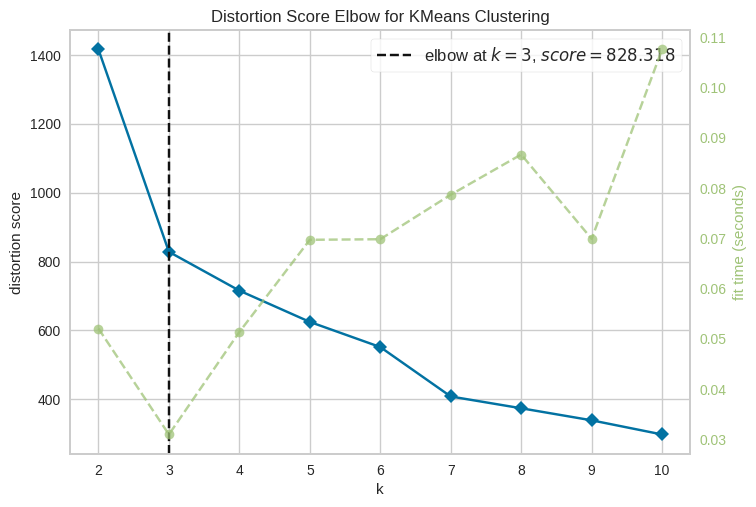

In [20]:
if isinstance(df_preprocessing, pd.DataFrame):
    X_np = df_preprocessing.values
else:
    X_np = df_preprocessing

# Inisialisasi model KMeans
kmeans = KMeans(random_state=42)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(2, 11))
visualizer.fit(X_np)
visualizer.show()
plt.show()

Hasil Elbow Method menunjukkan bahwa jumlah cluster optimal untuk data ini adalah 3. Ini berarti data dapat dibagi menjadi tiga kelompok utama, di mana setiap kelompok memiliki karakteristik yang lebih mirip satu sama lain dibandingkan dengan kelompok lain.

Penurunan distortion score yang signifikan terjadi hingga k = 3, tetapi setelah itu, penurunannya semakin kecil. Ini menandakan bahwa menambah jumlah cluster lebih dari 3 tidak memberikan peningkatan yang signifikan dalam kualitas pengelompokan.

Dengan memilih k = 3, kita mendapatkan keseimbangan antara akurasi dan kompleksitas model, sehingga hasil clustering tetap jelas dan interpretable tanpa membuat segmentasi yang berlebihan.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [21]:
# Ambil jumlah klaster optimal dari hasil Elbow
optimal_k = visualizer.elbow_value_
print(f"Jumlah cluster optimal berdasarkan Elbow Method: {optimal_k}")

# Inisialisasi dan melatih model K-Means dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
labels = kmeans.fit_predict(X_np)

# Ubah labels menjadi Pandas Series agar bisa digunakan untuk indexing
labels_series = pd.Series(labels, index=np.arange(len(labels)))

# Hitung Silhouette Score
silhouette_kmeans = silhouette_score(X_np, labels)
print(f"Silhouette Score untuk K-Means (k={optimal_k}): {silhouette_kmeans:.4f}")

Jumlah cluster optimal berdasarkan Elbow Method: 3
Silhouette Score untuk K-Means (k=3): 0.7468


Hasil evaluasi model clustering menunjukkan bahwa jumlah cluster optimal berdasarkan Elbow Method adalah 3. Ini berarti data paling efektif dikelompokkan ke dalam tiga segmen utama.

Selanjutnya, Silhouette Score dihitung untuk mengukur kualitas cluster yang terbentuk. Nilai 0.7468 menunjukkan bahwa pemisahan antar cluster cukup baik, dengan jarak antar kelompok yang jelas dan setiap data lebih dekat ke cluster-nya sendiri dibandingkan cluster lain.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Jumlah cluster optimal berdasarkan Elbow Method setelah PCA: 3
✅ Silhouette Score setelah PCA: 0.7529
Silhouette Score sebelum PCA: 0.7468


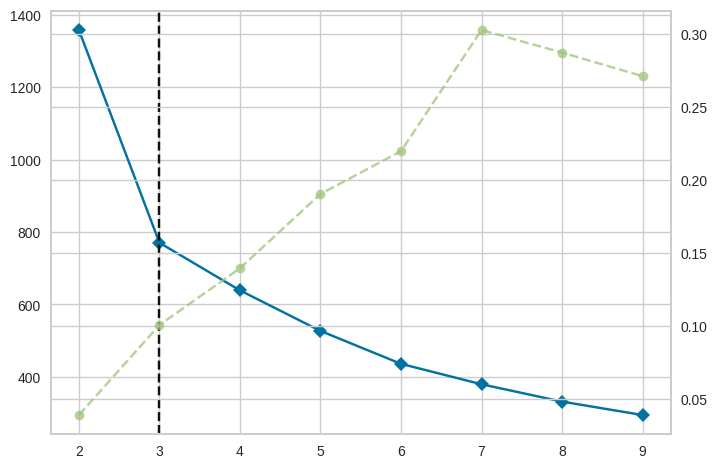

In [22]:
pca = PCA(n_components=0.98)
X_pca = pca.fit_transform(X_np)

# Tentukan jumlah cluster optimal dari data hasil PCA
visualizer = KElbowVisualizer(KMeans(n_init=10), k=(2, 10))
visualizer.fit(X_pca)  # <- Pastikan ini dilakukan setelah PCA
optimal_k = visualizer.elbow_value_
print(f"Jumlah cluster optimal berdasarkan Elbow Method setelah PCA: {optimal_k}")

# Lakukan clustering dengan K-Means setelah PCA
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=1, n_init=10)
kmeans_pca_labels = kmeans_pca.fit_predict(X_pca)

# Evaluasi dengan Silhouette Score setelah PCA
silhouette_pca = silhouette_score(X_pca, kmeans_pca_labels)
print(f"✅ Silhouette Score setelah PCA: {silhouette_pca:.4f}")

# Bandingkan dengan Silhouette Score sebelum PCA
print(f"Silhouette Score sebelum PCA: {silhouette_kmeans:.4f}")

Pada analisis ini, dilakukan Feature Selection menggunakan PCA (Principal Component Analysis) untuk mengurangi dimensi data tanpa kehilangan terlalu banyak informasi.

Hasil evaluasi menunjukkan bahwa jumlah cluster optimal tetap 3, seperti sebelumnya. Namun, setelah menerapkan PCA, nilai Silhouette Score meningkat dari 0.7468 menjadi 0.7529.

Peningkatan ini menunjukkan bahwa cluster yang terbentuk menjadi lebih baik dan lebih terpisah setelah reduksi dimensi, sehingga model clustering bekerja lebih optimal. PCA membantu menghilangkan informasi yang kurang relevan dan mempertahankan fitur yang paling berpengaruh dalam membentuk cluster.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

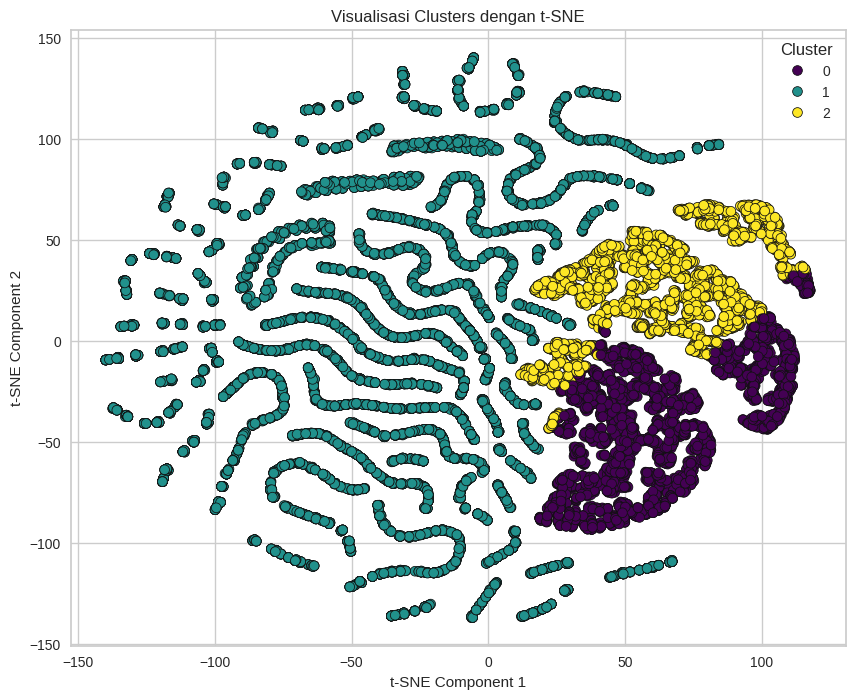

In [23]:
# Inisialisasi t-SNE untuk reduksi dimensi ke 2D
tsne = TSNE(n_components=2, random_state=1)

# Fit dan transform data hasil PCA
tsne_result = tsne.fit_transform(X_pca)  # Gunakan hasil PCA yang sudah diperbaiki

# Buat scatter plot hasil clustering dengan t-SNE 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=kmeans_pca_labels, palette="viridis", edgecolor="k")

plt.title("Visualisasi Clusters dengan t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

Visualisasi ini menggunakan t-SNE untuk mereduksi dimensi data menjadi 2D, sehingga kita bisa melihat pola cluster yang dihasilkan oleh K-Means setelah PCA.

- Cluster 0 (ungu) → Terletak di area yang cukup terpisah dari cluster lainnya, menunjukkan bahwa data dalam cluster ini memiliki karakteristik unik dibandingkan dua cluster lainnya.

- Cluster 1 (biru) → Tersebar di area yang luas dan tampak memiliki pola yang lebih menyebar dibandingkan cluster lainnya. Ini bisa menunjukkan bahwa anggota cluster ini memiliki variasi yang lebih besar.

- Cluster 2 (kuning) → Berada di dekat cluster ungu tetapi tetap memiliki batas yang cukup jelas. Ini bisa menunjukkan bahwa kedua cluster ini memiliki beberapa kemiripan dalam karakteristik datanya, namun masih cukup berbeda untuk dipisahkan oleh algoritma K-Means.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [24]:
# Salin dataframe hasil preprocessing
df_clustered = df_preprocessing.copy()
df_clustered['Cluster'] = kmeans_pca_labels
df_clustered.head()

,onehot__Customer_Type_B2B,onehot__Customer_Type_B2C,remainder__Unit_Price,remainder__Quantity,remainder__Discount,remainder__Total_Price,Cluster
0,1.0,0.0,0.063604,0.525253,0.666667,0.194525,2
1,0.0,1.0,0.141343,0.040404,0.000000,0.039584,1
2,1.0,0.0,0.092882,0.909091,0.666667,0.457720,2
3,0.0,1.0,0.169107,0.111111,0.000000,0.113309,1
4,0.0,1.0,0.061585,0.040404,0.000000,0.019105,1


In [25]:
# Inverse transform MinMaxScaler
df_hasil_cluster = data_pipeline.named_steps['scaler'].inverse_transform(df_preprocessing)

# Konversi kembali ke DataFrame
df_hasil_cluster = pd.DataFrame(df_hasil_cluster, columns=data_pipeline.get_feature_names_out())
df_hasil_cluster.head()

,onehot__Customer_Type_B2B,onehot__Customer_Type_B2C,remainder__Unit_Price,remainder__Quantity,remainder__Discount,remainder__Total_Price
0,1.0,0.0,1.58,53.0,0.1,75.37
1,0.0,1.0,3.12,5.0,0.0,15.60
2,1.0,0.0,2.16,91.0,0.1,176.90
3,0.0,1.0,3.67,12.0,0.0,44.04
4,0.0,1.0,1.54,5.0,0.0,7.70


In [26]:
# Bersihkan nama kolom agar kembali seperti awal
df_hasil_cluster.columns = [col.replace('remainder__', '') for col in df_hasil_cluster.columns]

# Ambil semua nama kolom hasil encoding
one_hot_feature_names = data_pipeline.named_steps['encoder'].get_feature_names_out()

# Inverse transform One-Hot Encoding
for col in one_hot_cols:
    encoded_cols = [name for name in one_hot_feature_names if col in name]
    if set(encoded_cols).issubset(df_hasil_cluster.columns):
        df_hasil_cluster[col] = df_hasil_cluster[encoded_cols].idxmax(axis=1).str.replace(f'onehot__{col}_', '', regex=True)
        # Hapus kolom One-Hot Encoding
        df_hasil_cluster.drop(columns=encoded_cols, inplace=True)
df_hasil_cluster.head()

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type
0,1.58,53.0,0.1,75.37,B2B
1,3.12,5.0,0.0,15.60,B2C
2,2.16,91.0,0.1,176.90,B2B
3,3.67,12.0,0.0,44.04,B2C
4,1.54,5.0,0.0,7.70,B2C


In [27]:
# Tambahkan kembali kolom Cluster
df_hasil_cluster['Cluster'] = df_clustered['Cluster'].values
print("\nData berhasil dikembalikan ke bentuk aslinya dengan tambahan kolom cluster")
print(df_hasil_cluster.head())


Data berhasil dikembalikan ke bentuk aslinya dengan tambahan kolom cluster
   Unit_Price  Quantity  Discount  Total_Price Customer_Type  Cluster
0        1.58      53.0       0.1        75.37           B2B        2
1        3.12       5.0       0.0        15.60           B2C        1
2        2.16      91.0       0.1       176.90           B2B        2
3        3.67      12.0       0.0        44.04           B2C        1
4        1.54       5.0       0.0         7.70           B2C        1


In [28]:
df_hasil_cluster.head()

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type,Cluster
0,1.58,53.0,0.1,75.37,B2B,2
1,3.12,5.0,0.0,15.60,B2C,1
2,2.16,91.0,0.1,176.90,B2B,2
3,3.67,12.0,0.0,44.04,B2C,1
4,1.54,5.0,0.0,7.70,B2C,1


In [29]:
df_hasil_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18366 entries, 0 to 18365
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unit_Price     18366 non-null  float64
 1   Quantity       18366 non-null  float64
 2   Discount       18366 non-null  float64
 3   Total_Price    18366 non-null  float64
 4   Customer_Type  18366 non-null  object 
 5   Cluster        18366 non-null  int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 789.3+ KB


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [30]:
cluster_count = df_hasil_cluster['Cluster'].value_counts()
print(cluster_count)

Cluster
1    12018
0     3453
2     2895
Name: count, dtype: int64


In [31]:
df_hasil_cluster.groupby('Cluster')['Customer_Type'].value_counts()

,,count
Cluster,Customer_Type,
0,B2B,3453
1,B2C,12018
2,B2B,2895


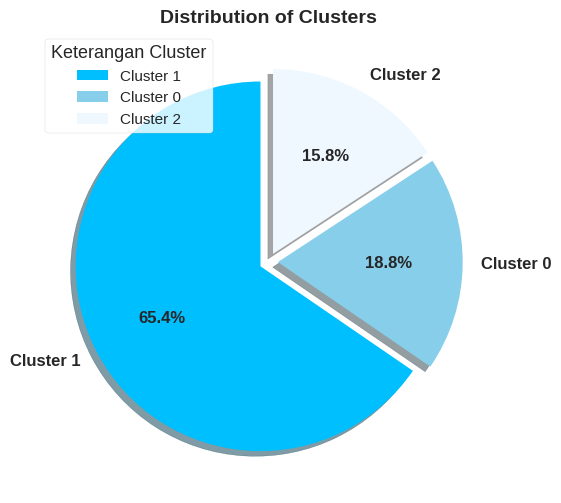

In [32]:
colors = ['deepskyblue', 'skyblue', 'aliceblue']
explode = [0.05] * len(cluster_count)

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(cluster_count, labels=[f"Cluster {i}" for i in cluster_count.index],
                                   autopct='%1.1f%%', startangle=90, colors=colors,
                                   explode=explode, shadow=True, textprops={'fontsize': 12, 'fontweight': 'bold'})

# 🔹 Tambahkan legend untuk memperjelas
plt.legend(wedges, [f"Cluster {i}" for i in cluster_count.index], title="Keterangan Cluster",
           loc="best", fontsize=11, title_fontsize=13, frameon=True)

plt.title('Distribution of Clusters', fontsize=14, fontweight='bold')
plt.show()

In [33]:
# Hitung rata-rata, min, dan max untuk setiap cluster
df_hasil_cluster.select_dtypes(include=['number']).groupby('Cluster').agg(['mean', 'min', 'max'])

Unit_Price                Quantity               Discount              \
              mean   min    max       mean   min    max      mean   min   max   
Cluster                                                                         
0         1.898514  0.32  20.13  27.342311   1.0   70.0  0.064451  0.05  0.15   
1         2.309765  0.46  14.26   7.973290   1.0   15.0  0.000000  0.00  0.00   
2         2.191399  0.35  17.67  75.642142  23.0  100.0  0.103713  0.05  0.15   

        Total_Price                 
               mean    min     max  
Cluster                             
0         43.352638   0.33  372.27  
1         18.513480   0.46  213.90  
2        142.838535  18.36  386.09

Customer_Type   B2B    B2C
Cluster                   
0              3453      0
1                 0  12018
2              2895      0 



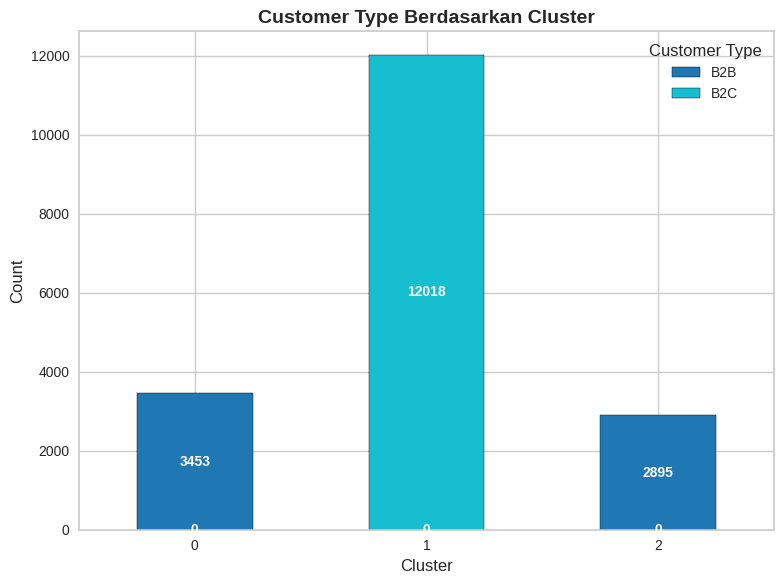

In [34]:
# Grup berdasarkan 'Cluster' dan 'Customer_Type'
customer_type_and_cluster_counts = df_hasil_cluster.groupby(['Cluster', 'Customer_Type']).size().unstack(fill_value=0)
print(customer_type_and_cluster_counts, '\n')

# Plot dengan stacked bar chart
ax = customer_type_and_cluster_counts.plot(
    kind='bar', stacked=True, figsize=(8, 6), colormap='tab10', edgecolor='black'
)

plt.title('Customer Type Berdasarkan Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Customer Type', fontsize=10)

# Tambahkan label nilai di atas setiap batang
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Analisis Karakteristik Cluster dari Model KMeans

Dari hasil analisis data, pelanggan terbagi ke dalam 3 cluster berdasarkan jumlah barang yang dibeli, harga satuan, diskon, total belanja, dan tipe customer. Berikut adalah penjelasan untuk setiap cluster:

## Cluster 0: Pelanggan Grosir B2B (Borongan, Murah, Dapat Diskon Sedikit)
- Harga barang per unit: **Murah** (Rp 1,89 per unit)
- Jumlah barang per transaksi: **Cukup banyak** (27 barang)
- Diskon rata-rata: **6,4%** (min 5%, max 15%)
- Total belanja rata-rata: **Rp 43,35** (max Rp 372,27)

📌 Kesimpulan:

- Cluster ini mayoritas terdiri dari pelanggan B2B, yaitu bisnis kecil yang membeli dalam jumlah sedang dengan harga satuan rendah dan diskon menengah.
- Pelanggan ini adalah **bisnis grosir kecil atau toko** yang beli dalam jumlah banyak, tapi masih dengan harga yang cukup murah.
- Mereka dapat diskon, tapi tidak sebanyak pelanggan besar.
- **Strategi**: Bisa dikasih promo tambahan supaya mereka makin sering beli dalam jumlah lebih besar, Upsell & Cross-sell: Promo bundling, diskon volume lebih tinggi jika beli lebih banyak.

## Cluster 1: Pelanggan Retail B2C (Beli Dikit, Harga Normal, Tanpa Diskon)
- Harga barang per unit: **Sedang** (Rp 2,31 per unit)
- Jumlah barang per transaksi: **Sedikit** (7 barang)
- Diskon rata-rata: **0%** (tidak ada diskon)
- Total belanja rata-rata: **Rp 18,51** (max Rp 213,90)

📌 Kesimpulan:

- Cluster ini mayoritas berisi pelanggan B2C, yaitu individu yang membeli dalam jumlah kecil dan cenderung tidak mendapatkan diskon.
- Ini adalah **pelanggan individu atau rumah tangga** yang beli untuk keperluan pribadi.
- Mereka beli dalam jumlah kecil dan tidak dapat diskon.
- **Strategi**: Bisa diberikan program loyalitas atau diskon kecil supaya mereka tertarik belanja lebih banyak, Loyalty Program: Cashback atau diskon kecil untuk pembelian selanjutnya.

## Cluster 2: Pelanggan Premium (Beli Banyak, Dapat Diskon Besar, Belanja Besar)
- Harga barang per unit: **Sedang** (Rp 2,19 per unit)
- Jumlah barang per transaksi: **Sangat banyak** (75 barang)
- Diskon rata-rata: **10,3%** (min 5%, max 15%)
- Total belanja rata-rata: **Rp 142,83** (max Rp 386,09)

📌 Kesimpulan:

- Cluster ini mayoritas adalah pelanggan B2B berskala besar yang membeli dalam jumlah besar dan mendapatkan diskon paling tinggi.
- Pelanggan ini adalah **pemilik bisnis besar atau reseller** yang beli barang dalam jumlah besar.
- Karena mereka beli banyak, mereka dapat diskon paling besar.
- **Strategi**: Bisa diberikan program eksklusif atau layanan premium supaya mereka terus belanja dalam jumlah besar, Exclusive Membership: Keanggotaan VIP dengan lebih banyak keuntungan, misalnya gratis ongkir atau prioritas stok.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [35]:
df_hasil_cluster.to_csv("Data_hasil_clustering.csv", index=False)
print("✅ Hasil clustering telah disimpan ke 'Data_hasil_clustering.csv'")

✅ Hasil clustering telah disimpan ke 'Data_hasil_clustering.csv'
